## Data Visualization Project - Analysis of top 10,000 actors on imdb

### Import the necessary libraries.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Data processing

For this project, we were initially planning on working on the entire IMDB actor dataset, however even simple database operations on it were taking time in the order of several minutes, so we decided to downsize to a dataset found on Kaggle that had data for the top 10,000 actors on IMDB.

Since graph layout and computing network diameter are very computationally expensive operations, working on the smaller dataset itself took hours at a time at certain points, clearly doing so on the larger IMDB dataset would not have been possible.

(Kaggle database that we worked on: https://www.kaggle.com/datasets/darinhawley/imdb-films-by-actor-for-10k-actors)

In [2]:
actorfilms = pd.read_csv('actorfilms.csv') # Read the dataset
actorfilms.head()

Actor    ActorID                   Film  Year  Votes  Rating  \
0  Fred Astaire  nm0000001            Ghost Story  1981   7731     6.3   
1  Fred Astaire  nm0000001        The Purple Taxi  1977    533     6.6   
2  Fred Astaire  nm0000001  The Amazing Dobermans  1976    369     5.3   
3  Fred Astaire  nm0000001   The Towering Inferno  1974  39888     7.0   
4  Fred Astaire  nm0000001              Midas Run  1969    123     4.8   

      FilmID  
0  tt0082449  
1  tt0076851  
2  tt0074130  
3  tt0072308  
4  tt0064664

In [3]:
# Perform the merge operation
actor_actor = pd.merge(actorfilms, actorfilms, on = 'FilmID')[['Actor_x', 'ActorID_x', 'Film_x',
                                                              'Year_x', 'Rating_x', 'FilmID', 'Actor_y', 'ActorID_y']]
# Rename columns
actor_actor.rename(columns = {'Film_x': 'Film', 'Year_x': 'Year', 'Votes_x': 'Votes', 'Rating_x': 'Rating'}, 
                  inplace = True)
# Remove unnecessary self edges
actor_actor = actor_actor[actor_actor['Actor_x'] != actor_actor['Actor_y']]
# Reset the index
actor_actor.reset_index(drop = True, inplace = True)
# Reorder columns
actor_actor = actor_actor[['Actor_x', 'Actor_y', 'ActorID_x', 'ActorID_y', 'Film', 'Year', 'Rating', 'FilmID']]
edgelist = actor_actor.copy(deep=True)
actor_actor.tail(20)

Actor_x                Actor_y  ActorID_x  ActorID_y  \
1462840     Paloma Kwiatkowski         Madison Iseman  nm4485819  nm5589690   
1462841         Madison Iseman     Paloma Kwiatkowski  nm5589690  nm4485819   
1462842  Kirby Howell-Baptiste           Jaycie Dotin  nm4624730  nm4868175   
1462843           Jaycie Dotin  Kirby Howell-Baptiste  nm4868175  nm4624730   
1462844           Kim Soo-Hyun          Seo-joon Park  nm4633543  nm6124994   
1462845          Seo-joon Park           Kim Soo-Hyun  nm6124994  nm4633543   
1462846        Hannah Arterton          Josh O'Connor  nm4687436  nm4853066   
1462847          Josh O'Connor        Hannah Arterton  nm4853066  nm4687436   
1462848           Melvin Gregg           Taylor Mosby  nm4713584  nm5604561   
1462849           Taylor Mosby           Melvin Gregg  nm5604561  nm4713584   
1462850           Kimiko Glenn        Lauren E. Banks  nm4733752  nm5524602   
1462851        Lauren E. Banks           Kimiko Glenn  nm5524602  nm4733752   
1462852        Josefin Asplund           Gustav Lindh  nm4739140  nm6625833   
1462853           Gustav Lindh        Josefin Asplund  nm6625833  nm4739140   
1462854        Erika Harlacher         Erica Lindbeck  nm4808080  nm6949652   
1462855         Erica Lindbeck        Erika Harlacher  nm6949652  nm4808080   
1462856               Simu Liu        Michelle Mylett  nm4855517  nm5572919   
1462857        Michelle Mylett               Simu Liu  nm5572919  nm4855517   
1462858       Jonah Hauer-King       Harris Dickinson  nm5999355  nm6170168   
1462859       Harris Dickinson       Jonah Hauer-King  nm6170168  nm5999355   

                           Film  Year  Rating     FilmID  
1462840              Riot Girls  2019     4.5  tt6049106  
1462841              Riot Girls  2019     4.5  tt6049106  
1462842                 Find Me  2018     6.3  tt6740154  
1462843                 Find Me  2018     6.3  tt6740154  
1462844                    Real  2017     4.9  tt6904062  
1462845                    Real  2017     4.9  tt6904062  
1462846                 Amorous  2014     4.5  tt2723176  
1462847                 Amorous  2014     4.5  tt2723176  
1462848  Cleaver Family Reunion  2013     4.0  tt2552570  
1462849  Cleaver Family Reunion  2013     4.0  tt2552570  
1462850              In Reality  2018     5.3  tt6106980  
1462851              In Reality  2018     5.3  tt6106980  
1462852              The Circle  2015     5.8  tt2122313  
1462853              The Circle  2015     5.8  tt2122313  
1462854                NiNoKuni  2019     6.1  tt9760504  
1462855                NiNoKuni  2019     6.1  tt9760504  
1462856            Antisocial 2  2015     4.5  tt4004084  
1462857            Antisocial 2  2015     4.5  tt4004084  
1462858   Postcards from London  2018     5.1  tt6280608  
1462859   Postcards from London  2018     5.1  tt6280608

We convert the ratings to -1 * the original rating for the purpose of running algorithms like the shortest path algorithm.

In [4]:
edgelist['Rating'] = 1 / actor_actor['Rating']
edgelist.sample(10)

Actor_x            Actor_y  ActorID_x  ActorID_y  \
200686        Marley Shelton     Michael Bacall  nm0005420  nm0045209   
973598              Nia Long    Hayes MacArthur  nm0000505  nm1887429   
157945       Imelda Staunton     Michael Keaton  nm0001767  nm0000474   
1322349           Jane Greer  Margaret Hamilton  nm0339452  nm0002121   
570138   Haley Lu Richardson       Parker Posey  nm4726634  nm0000205   
151229        Robert Redford     Michael Madsen  nm0000602  nm0000514   
1313574        Eiza Gonzalez        Macon Blair  nm2555462  nm0086301   
730242         Robyn Malcolm      Paul Anderson  nm0539137  nm2167957   
1247500        Craig Roberts    Natasha Leggero  nm1064292  nm1641089   
1384592           Bill Nighy     Martin Freeman  nm0631490  nm0293509   

                            Film  Year    Rating     FilmID  
200686                Grindhouse  2007  0.133333  tt0462322  
973598          Are We Done Yet?  2007  0.232558  tt0422774  
157945    Much Ado About Nothing  1993  0.136986  tt0107616  
1322349  George White's Scandals  1945  0.175439  tt0037736  
570138                  Columbus  2017  0.138889  tt5990474  
151229               The Natural  1984  0.133333  tt0087781  
1313574             I Care a Lot  2020  0.158730  tt9893250  
730242                  Hostiles  2017  0.138889  tt5478478  
1247500                Neighbors  2014  0.158730  tt2004420  
1384592        Shaun of the Dead  2004  0.126582  tt0365748

Change a few column names and export to CSV to input data into Gephi.

In [5]:
gephi_edges = actor_actor[['Actor_x', 'Actor_y']].copy(deep = True)
gephi_edges.rename(columns = {'Actor_x': 'Source', 'Actor_y': 'Target'}, inplace = True)
gephi_edges.head(10)

Source           Target
0   Fred Astaire      Alice Krige
1   Fred Astaire    Patricia Neal
2   Fred Astaire  Michael O'Neill
3   Fred Astaire         Ken Olin
4    Alice Krige     Fred Astaire
5    Alice Krige    Patricia Neal
6    Alice Krige  Michael O'Neill
7    Alice Krige         Ken Olin
8  Patricia Neal     Fred Astaire
9  Patricia Neal      Alice Krige

In [6]:
gephi_edges.to_csv('gephi_edgelist.csv', index = False)

Load the data into a networkx multigraph with the (1 / Ratings) as edge weights and the name of the film as the key of an edge.

We set the edge ratings as the reciprocal of the ratings for the purpose of running shortest paths and MST algorithms later on.

In [7]:
# Create a multigraph
G = nx.from_pandas_edgelist(edgelist, source = 'Actor_x', target = 'Actor_y', 
                            edge_attr = ['Film', 'Rating'], create_using = nx.MultiGraph())
# and a simple graph
simple_G = nx.from_pandas_edgelist(edgelist, source = 'Actor_x', target = 'Actor_y', create_using = nx.Graph())

# Data Visualization and Analysis

We now input this data into Gephi to get an initial overview of the structure of the relationship that is present here.

Running a layout algorithm on a huge graph with nearly 10,000 nodes and over 600,000 edges proves to be very computationally expensive.

We ran this for upwards of 2 hours to get a 15,000 x 15,000 pixel 200MB image.

**Fruchterman Reingold layout**
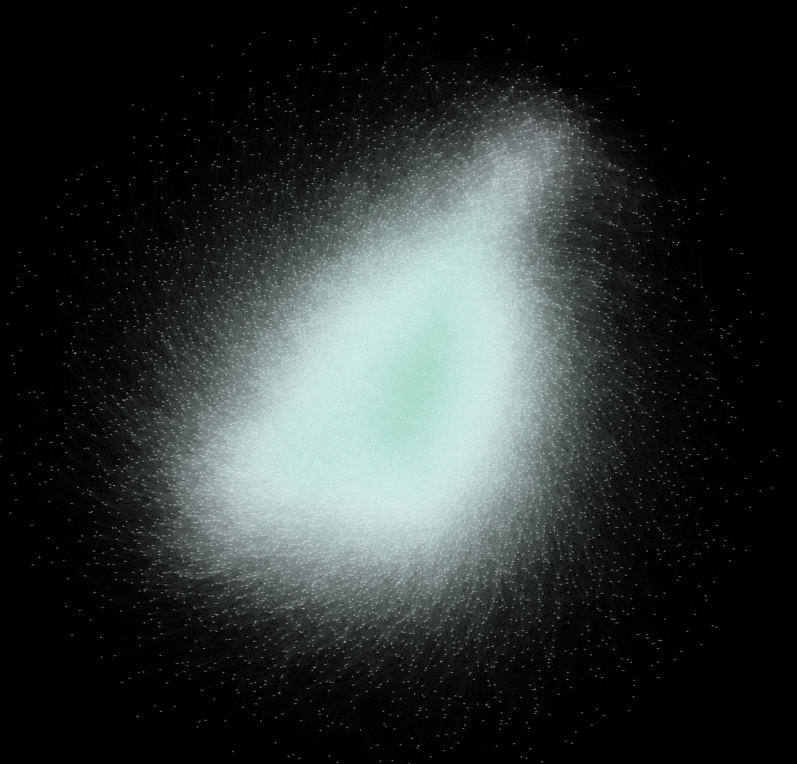


**Force Atlas 2**
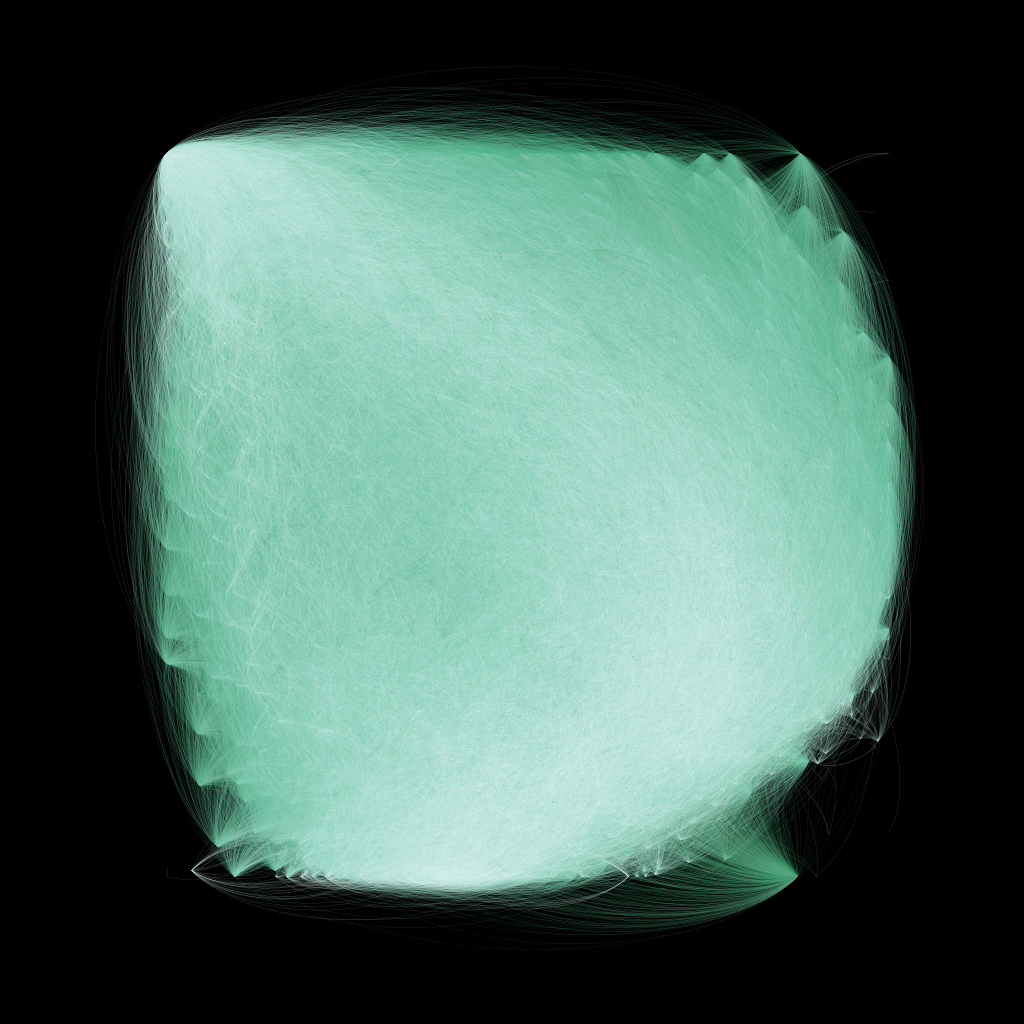

**Yifan Hu**
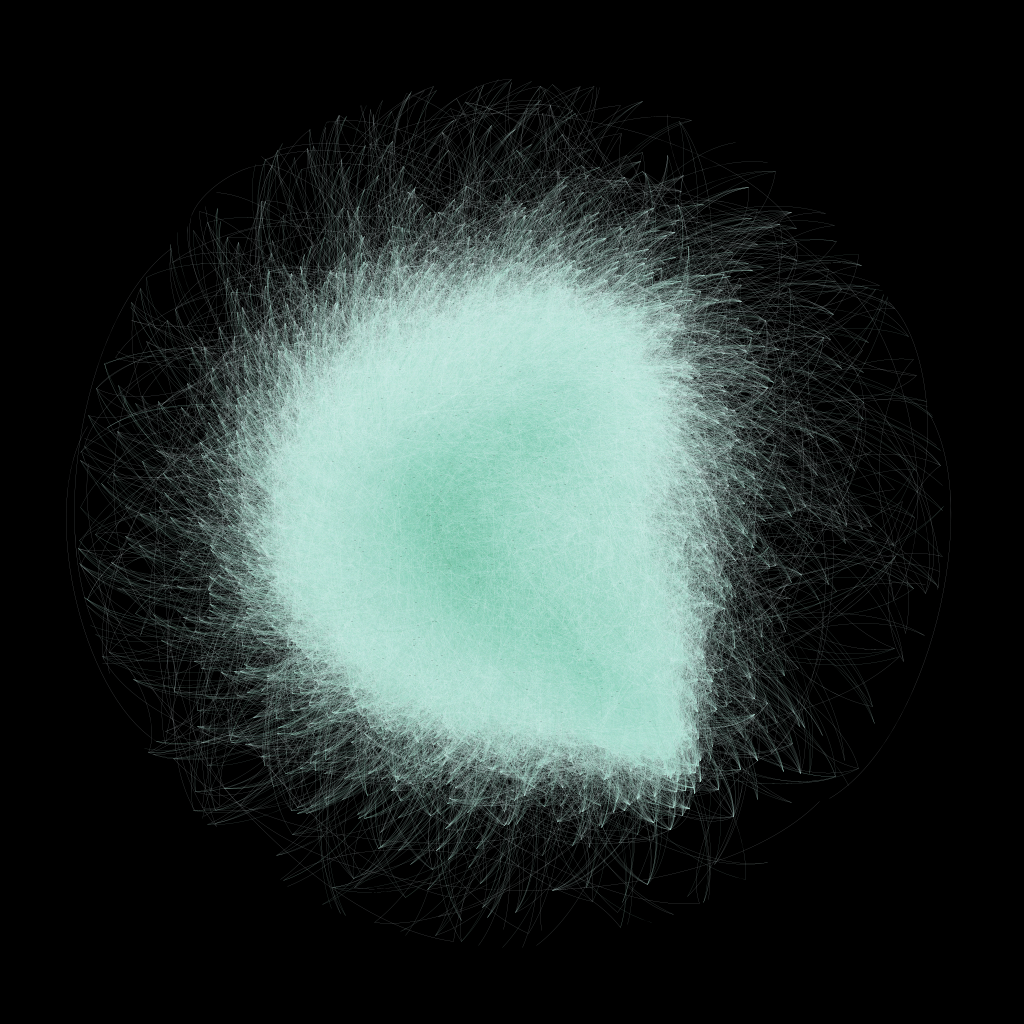

**Yifan Hu + Force Atlas 2**
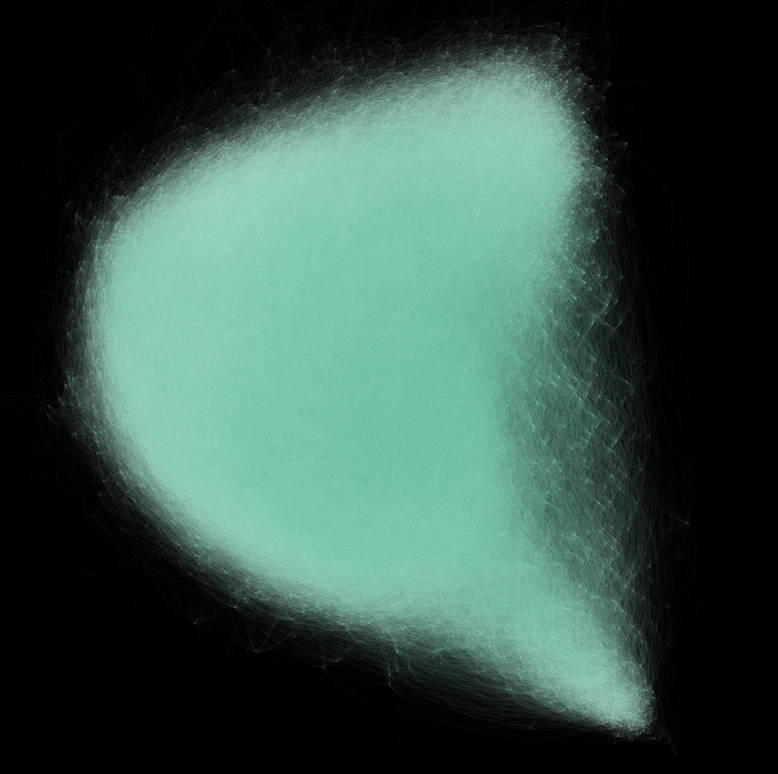

## Diameter and Degree of Seperation

Using Gephi to analyse the network diameter of the given graph, we get:

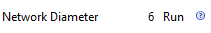

This is like the common social networks idea of 'Six Degrees of Seperation' wherein any two people can be connected in a minimum number of six steps, the popular film version of this is 'Six Degrees of Kevin Bacon' where any actor can be connected to Kevin Bacon within 6 movies.

(Six Degrees of Seperation: https://en.wikipedia.org/wiki/Six_degrees_of_separation)
(Six Degrees of Kevin Bacon: https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon)

## Connected Components

We first try to understand the number of connected components in the graph, since this is a graph of the top 10,000 actors on imdb, preliminary intuition would suggest that we might just get one connected component since popular actors tend to work a lot with each other.

In [8]:
components = nx.connected_components(G)
s1 = next(components)
s2 = next(components)
s3 = next(components)

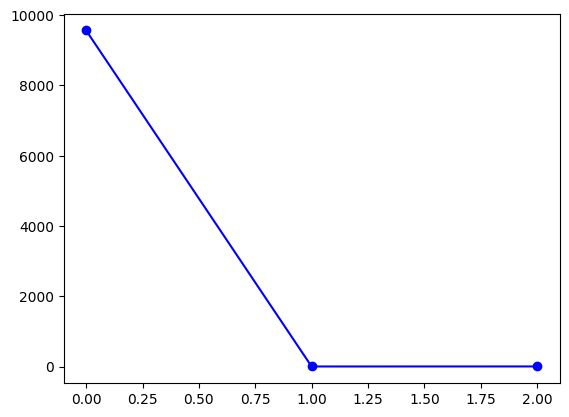

In [9]:
plt.plot([len(n) for n in nx.connected_components(G)], "b-", marker = "o")
plt.show()

As can be observed, we're getting one huge connected component consisting of nearly all the nodes, and 2 tiny components.

This resembles a common social network phenomenon of 'Giant Components' wherein in any sufficiently sized graph, one connected component will encompass a large fraction of the entire graph's vertices.
(https://en.wikipedia.org/wiki/Giant_component)

## Degree Analysis

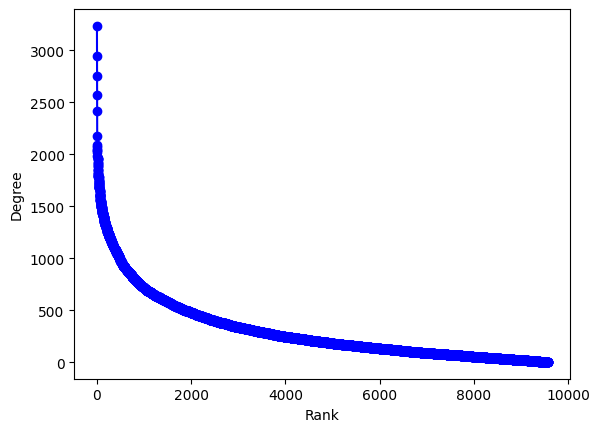

In [10]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
plt.plot(degree_sequence, "b-", marker="o")
plt.ylabel("Degree")
plt.xlabel("Rank")
plt.show()

Export the data for visualization in Tableau.

In [11]:
degree_seq = pd.Series(degree_sequence, name = 'Degree')
degree_seq.index += 1
degree_seq.index.name = 'Rank'
degree_seq.to_csv('degreedata.csv')

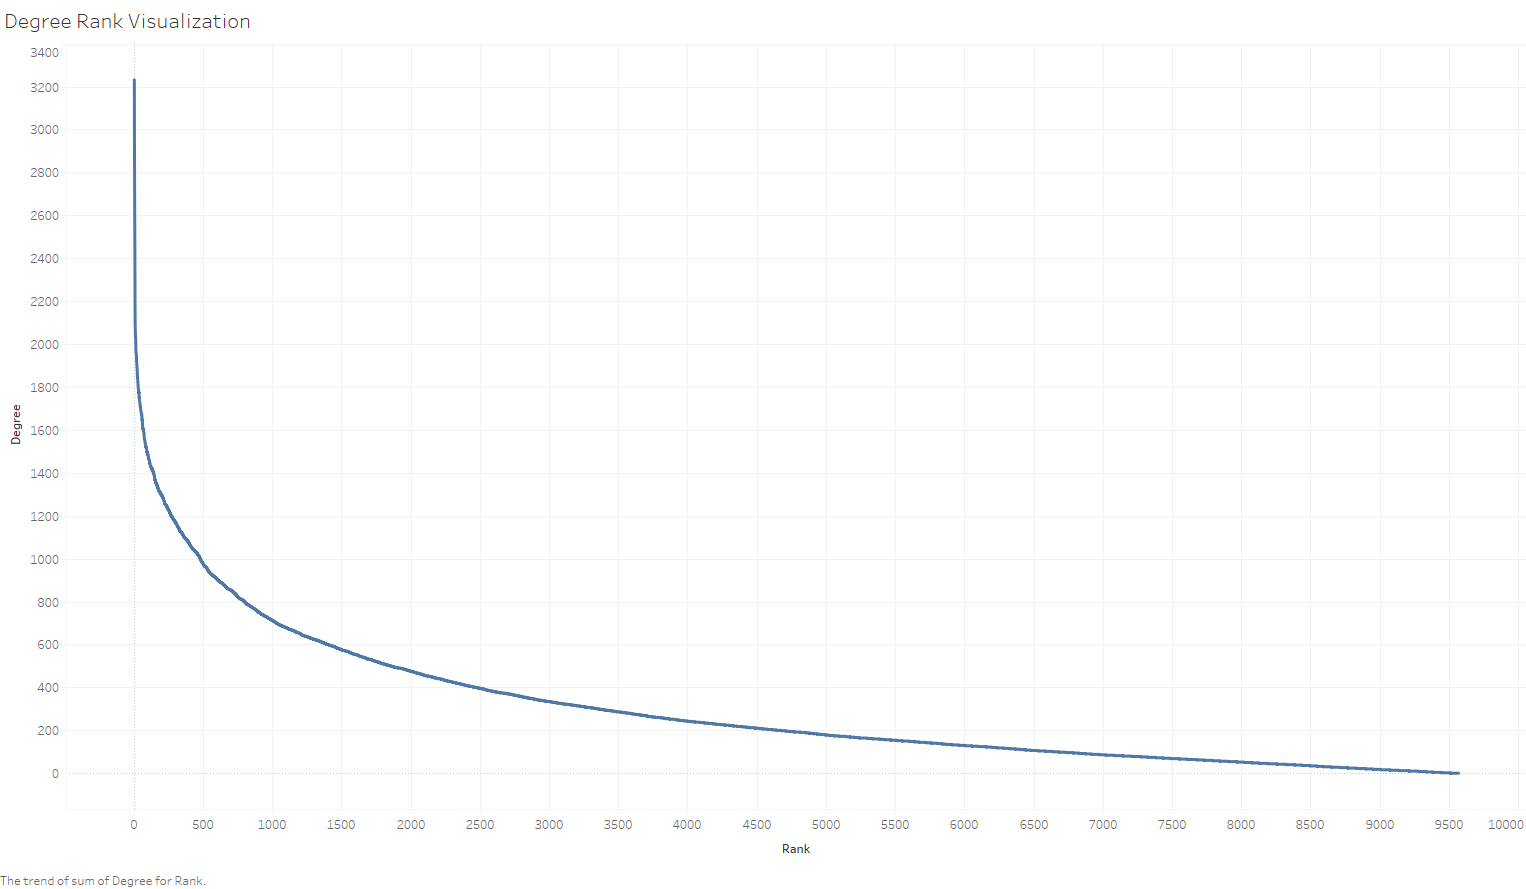

Interestingly, the graph above, plotting the degrees w.r.t to rank of the particular degree, seems to mimic the famous statistics law called 'Zipf's law' where in the rank and frequency distribution is often observed to be an inverse relation, a popular rendition of this law is in the frequency of words in the english language, where the 2nd most used word has half the frequency of the most used word, the third most used word has one third the frequency, and so on.

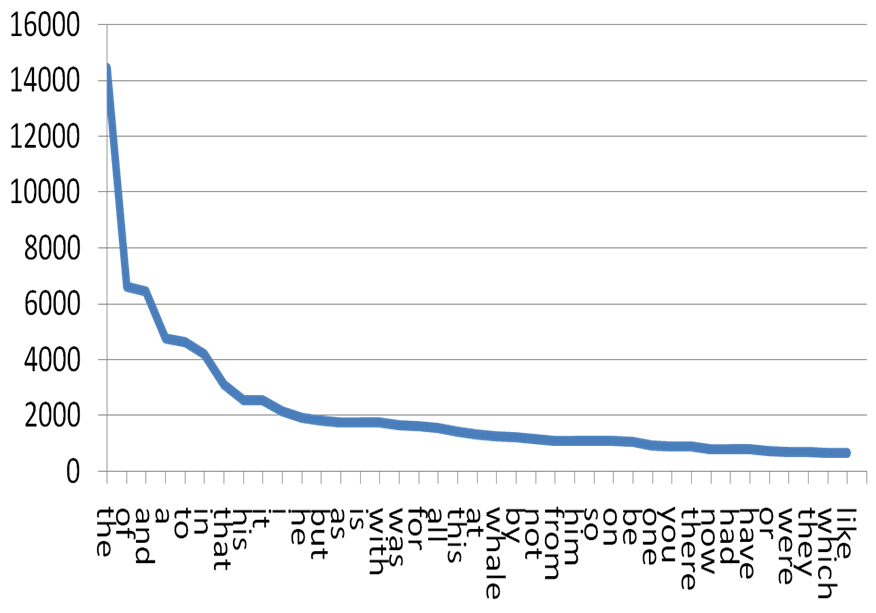

Before moving on, we export this data to make a better visualization using Tableau.

## Minimum Spanning Tree

First we create the minimum spanning tree on the largest component of the graph

In [12]:
mst = nx.minimum_spanning_tree(G.subgraph(s1), weight = 'Rating')

Then export it to Gephi to create graphs.

In [13]:
mst_df = nx.to_pandas_edgelist(mst)
mst_df.rename(columns = {'Film': 'Label'}, inplace = True)
mst_df.to_csv('mst_edgelist.csv', index = False)

The minimum spanning tree of a graph is a subset of edges of a connected weighted graph that connects all the vertices without any cycles, and is of minimum possible weight.

The use of MST here could portray actor relations but with edges portraying the best movies creating among the actors, in a way representing the finest works produced by the movie industry, graphing this information as a network lets you observe how actors fit in with these movies.

(Minimum Spanning Tree: https://en.wikipedia.org/wiki/Minimum_spanning_tree)

Porting this into Gephi and graphing using Force Atlas 2 + Yifan Hu, we get:

**MST**
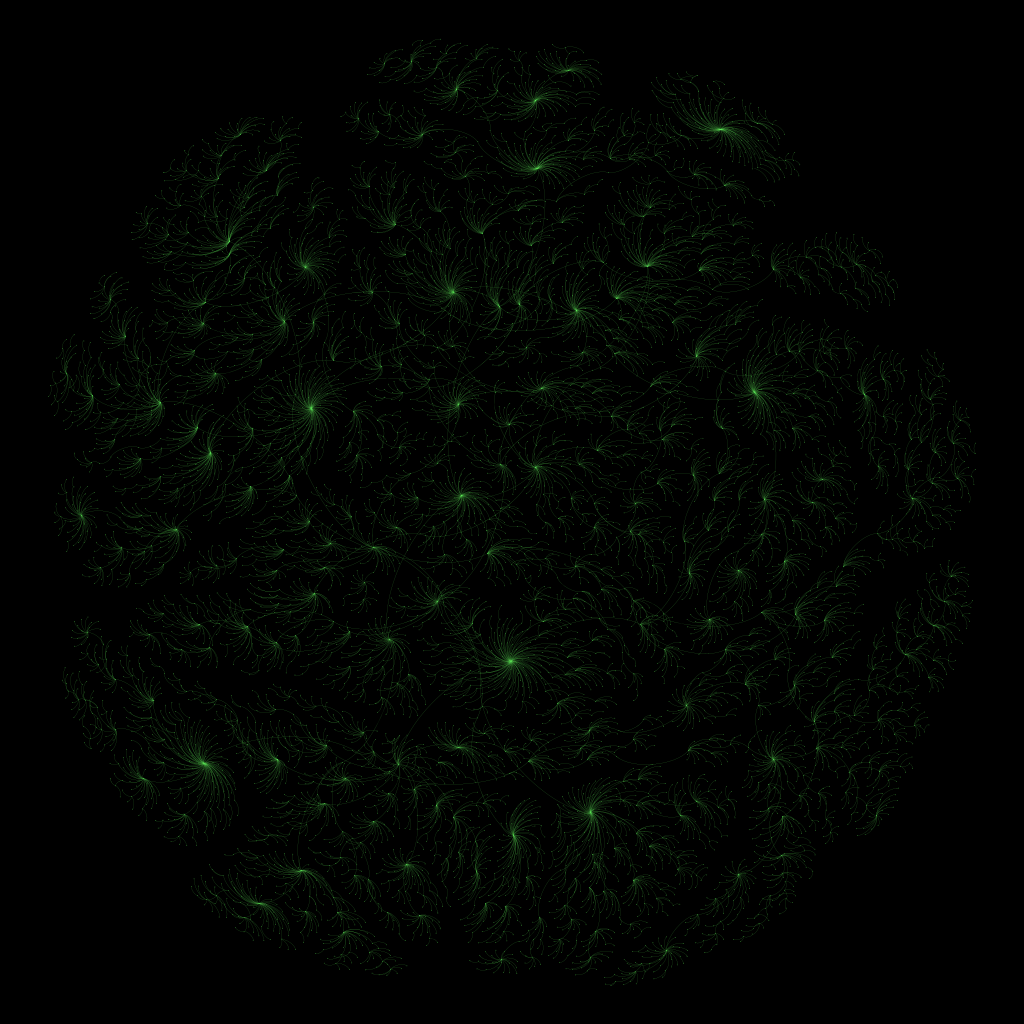

## Shortest Path

In [23]:
# Returns the shortest path from a source actor to a target actor, along the path of the highest rated movies in between
def shortestpath(source, target):
    shortest_path = nx.shortest_path(G, source = source, target = target, weight = 'Rating')
    movie_list = []
    for i in range(1, len(shortest_path)):
        currdf = actor_actor[actor_actor['Actor_x'] == shortest_path[i - 1]]
        currdf = currdf[currdf['Actor_y'] == shortest_path[i]]
        movie_list.append(actor_actor.iloc[currdf['Rating'].idxmax()]['Film'])
    
    for i in range(0, len(shortest_path) - 1):
        print(shortest_path[i], "was in", movie_list[i], "with", shortest_path[i + 1])

In [27]:
shortestpath('Salman Khan', 'Brad Pitt')

Salman Khan was in Kuch Kuch Hota Hai with Anupam Kher
Anupam Kher was in Silver Linings Playbook with Robert De Niro
Robert De Niro was in Sleepers with Brad Pitt


The above code is a proof of concept for a simple shortest path implementation similar to the one found on Oracle of Bacon, which returns the shortest path between two actors and also the movies that connect the two actors.

The unique thing I tried to add with this implementation compared to Oracle of Bacon was to make sure that the path between the two actors would go through the highest rated movies in between them.

I was planning on making this into a more aesthetically pleasing visualization however could not do it due to time constraints.

(Oracle of Bacon: https://oracleofbacon.org/)